In [1]:
# %run ./main.py

# uncomment to run main.py to generate dataset

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
# from IPython.core.interactiveshell import InteractiveShell # TODO do we need this?

np.random.seed(42)
symbol = 'XLE'

# after generating dataset in cell above, import dataset
df = pd.read_csv("data/df_"+symbol+"_aux.csv")
df = df[df['timestamp'] < '2016-01-01']  # For backtesting the last 5 years will be excluded from training.
df['labels'] = df['labels'].astype(np.int8)
# if 'dividend_amount' in df.columns:
#   df.drop(columns=['dividend_amount', 'split_coefficient'], inplace=True)
display(df.head(30))

,Unnamed: 0,timestamp,open,high,low,close,volume,rsi_6,rsi_7,rsi_8,...,eom_18_EURUSD=X,eom_19_EURUSD=X,eom_20_EURUSD=X,eom_21_EURUSD=X,eom_22_EURUSD=X,eom_23_EURUSD=X,eom_24_EURUSD=X,eom_25_EURUSD=X,eom_26_EURUSD=X,labels
0,810,2004-01-06,17.814430,17.833448,17.662278,17.776392,691100,91.334101,81.891705,82.829501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,811,2004-01-07,17.681286,17.681286,17.484757,17.592531,1676800,72.556789,77.477096,70.491296,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,812,2004-01-08,17.611557,17.674953,17.459406,17.643255,1334900,63.748235,68.320334,73.474718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,813,2004-01-09,17.592536,17.877821,17.510121,17.732008,2369800,51.689542,63.117682,67.590673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,814,2004-01-12,17.789070,17.839787,17.719335,17.782730,820000,61.661799,64.749230,71.158897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,815,2004-01-13,17.846125,17.960239,17.751031,17.789068,1003000,64.006560,62.934676,66.026340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,816,2004-01-14,17.782722,17.782722,17.630570,17.744684,830200,62.991169,58.111141,57.376842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,817,2004-01-15,17.782727,17.827105,17.440386,17.446726,1024100,47.058603,63.999377,58.823626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,818,2004-01-16,17.560844,17.655938,17.421370,17.611561,355600,37.736816,31.788480,48.484904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,819,2004-01-20,17.782731,18.074355,17.719335,18.055336,956200,63.076888,57.807452,49.999962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [3]:
df.columns[426:]

Index(['eom_26', 'unnamed: 0_CL=F', 'open_CL=F', 'high_CL=F', 'low_CL=F',
       'close_CL=F', 'volume_CL=F', 'rsi_6_CL=F', 'rsi_7_CL=F', 'rsi_8_CL=F',
       ...
       'eom_18_EURUSD=X', 'eom_19_EURUSD=X', 'eom_20_EURUSD=X',
       'eom_21_EURUSD=X', 'eom_22_EURUSD=X', 'eom_23_EURUSD=X',
       'eom_24_EURUSD=X', 'eom_25_EURUSD=X', 'eom_26_EURUSD=X', 'labels'],
      dtype='object', length=854)

In [4]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#[:, 'open':'eom_26']
list_features = list(df.loc[:, 'open':'eom_26_EURUSD=X'].columns)
print('Total number of features', len(list_features))
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 'open':'eom_26_EURUSD=X'].values, df['labels'].values, train_size=0.8, 
                                                    test_size=0.2, random_state=2, shuffle=True, stratify=df['labels'].values)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=0.8, test_size=0.2, 
                                                random_state=2, shuffle=True, stratify=y_train)

scaler = MinMaxScaler(feature_range=(0, 1)) # or StandardScaler?
x_train = scaler.fit_transform(x_train)
x_cv = scaler.transform(x_cv)
x_test = scaler.transform(x_test)

x_main = x_train.copy()
print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

Total number of features 1277
Shape of x, y train/cv/test (1899, 1277) (1899,) (475, 1277) (475,) (594, 1277) (594,)


In [5]:
num_features = 225  # should be a perfect square
selection_method = 'all'
topk = 320 if selection_method == 'all' else num_features

In [6]:
%%time
from operator import itemgetter
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

if selection_method == 'anova' or selection_method == 'all':
    select_k_best = SelectKBest(f_classif, k=topk)
    if selection_method != 'all':
        x_train = select_k_best.fit_transform(x_main, y_train)
        x_cv = select_k_best.transform(x_cv)
        x_test = select_k_best.transform(x_test)
    else:
        select_k_best.fit(x_main, y_train)
    
    selected_features_anova = itemgetter(*select_k_best.get_support(indices=True))(list_features)
    print(selected_features_anova)
    print(select_k_best.get_support(indices=True))
    print("****************************************")
    
if selection_method == 'mutual_info' or selection_method == 'all':
    select_k_best = SelectKBest(mutual_info_classif, k=topk)
    if selection_method != 'all':
        x_train = select_k_best.fit_transform(x_main, y_train)
        x_cv = select_k_best.transform(x_cv)
        x_test = select_k_best.transform(x_test)
    else:
        select_k_best.fit(x_main, y_train)

    selected_features_mic = itemgetter(*select_k_best.get_support(indices=True))(list_features)
    print(len(selected_features_mic), selected_features_mic)
    print(select_k_best.get_support(indices=True))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 856  899  900  901  902  903  904  905  906  907  908  909  910  911
  912  913  914  915  916  917  918  919  941  942  943  944  945  946
  947  948  949  950  951  952  953  954  955  956  957  958  959  960
  961 1193 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205
 1206 1207 1208 1209 1210 1211 1212 1213 1256 1257 1258 1259 1260 1261
 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275
 1276] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


('rsi_6', 'rsi_7', 'rsi_8', 'rsi_9', 'rsi_10', 'rsi_11', 'rsi_12', 'rsi_13', 'rsi_14', 'rsi_15', 'rsi_16', 'wr_6', 'wr_7', 'wr_8', 'wr_9', 'wr_10', 'wr_11', 'wr_12', 'wr_13', 'wr_14', 'wr_15', 'wr_16', 'wr_17', 'wr_18', 'wr_19', 'wr_20', 'wr_21', 'wr_22', 'wr_23', 'wr_24', 'wr_25', 'wr_26', 'mfi_6', 'mfi_7', 'mfi_8', 'mfi_9', 'mfi_10', 'mfi_11', 'mfi_12', 'mfi_13', 'mfi_14', 'mfi_15', 'mfi_16', 'mfi_17', 'mfi_18', 'mfi_19', 'mfi_20', 'mfi_21', 'mfi_22', 'mfi_23', 'mfi_24', 'mfi_25', 'roc_6', 'roc_7', 'roc_8', 'roc_9', 'roc_10', 'roc_11', 'roc_12', 'roc_13', 'roc_14', 'roc_15', 'roc_16', 'roc_17', 'roc_18', 'roc_19', 'roc_20', 'roc_21', 'roc_22', 'roc_23', 'roc_24', 'roc_25', 'roc_26', 'cmf_6', 'cmf_7', 'cmf_8', 'cmf_9', 'cmf_10', 'cmf_11', 'cmf_12', 'cmf_13', 'cmf_14', 'cmf_15', 'cmf_16', 'cmf_17', 'cmf_18', 'cmf_20', 'cmo_6', 'cmo_7', 'cmo_8', 'cmo_9', 'cmo_10', 'cmo_11', 'cmo_12', 'cmo_13', 'cmo_14', 'cmo_15', 'cmo_16', 'cmo_17', 'trix_6', 'cci_6', 'cci_7', 'cci_8', 'cci_9', 'cci_10'

In [7]:
if selection_method == 'all':
    common = list(set(selected_features_anova).intersection(selected_features_mic))
    print("common selected featues", len(common), common)
    if len(common) < num_features:
        raise Exception('number of common features found {} < {} required features. Increase "topk variable"'.format(len(common), num_features))
    feat_idx = []
    for c in common:
        feat_idx.append(list_features.index(c))
    feat_idx = sorted(feat_idx[0:225])
    print(feat_idx)

common selected featues 270 ['kdjk_16', 'mfi_15', 'rsv_26', 'fi_22_CL=F', 'roc_15', 'wr_20', 'eom_20', 'cci_6', 'cci_7', 'roc_22', 'cci_26', 'rsv_10', 'dpo_6', 'cmo_15', 'cmf_18', 'wr_7', 'rsv_22_CL=F', 'wr_15', 'cmo_16', 'wr_7_CL=F', 'eom_16', 'rsi_6', 'wr_23_CL=F', 'kdjk_24', 'fi_9', 'wr_23', 'wr_13_CL=F', 'fi_15', 'fi_21', 'cci_14', 'eom_15', 'rsv_17_CL=F', 'wr_18_CL=F', 'rsv_21_CL=F', 'cci_12', 'cci_21_CL=F', 'fi_7_CL=F', 'eom_6', 'rsv_11_CL=F', 'wr_26_CL=F', 'wr_18', 'wr_8', 'cci_10', 'roc_6', 'rsv_19_CL=F', 'fi_24', 'wr_12', 'roc_12', 'rsv_25', 'wr_17_CL=F', 'cmf_16', 'fi_18', 'roc_9', 'eom_9', 'cmo_7', 'eom_23', 'rsi_7', 'roc_7_CL=F', 'wr_24', 'wr_14', 'cci_17_CL=F', 'fi_19_CL=F', 'kdjk_23', 'rsv_6', 'rsv_24_CL=F', 'kdjk_11', 'wr_17', 'mfi_6', 'kdjk_20', 'kdjk_7', 'cci_22', 'cci_25_CL=F', 'mfi_7', 'fi_19', 'wr_20_CL=F', 'wr_10_CL=F', 'eom_18', 'kdjk_25', 'roc_10_CL=F', 'wr_11', 'rsv_15_CL=F', 'cci_14_CL=F', 'roc_14', 'rsv_18_CL=F', 'kdjk_22', 'fi_20_CL=F', 'mfi_12', 'rsi_10', 'f

In [8]:
if selection_method == 'all':
    x_train = x_train[:, feat_idx]
    x_cv = x_cv[:, feat_idx]
    x_test = x_test[:, feat_idx]

print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, 
                                                             y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

Shape of x, y train/cv/test (1899, 225) (1899,) (475, 225) (475,) (594, 225) (594,)


In [9]:
_labels, _counts = np.unique(y_train, return_counts=True)
print("percentage of class 0 = {}, class 1 = {}".format(_counts[0]/len(y_train) * 100, _counts[1]/len(y_train) * 100))

percentage of class 0 = 5.792522380200105, class 1 = 5.581885202738284


In [10]:
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from utils import reshape_array_as_image
from metrics import f1_weighted, f1_metric

def get_sample_weights(y): # TODO add source
    """
    calculate the sample weights based on class weights. Used for models with
    imbalanced data and one hot encoding prediction.

    params:
        y: class labels as integers
    """

    y = y.astype(int)  # compute_class_weight needs int labels
    class_weights = compute_class_weight('balanced', np.unique(y), y)
    
    print("real class weights are {}".format(class_weights), np.unique(y))
    print("value_counts", np.unique(y, return_counts=True))
    sample_weights = y.copy().astype(float)
    for i in set(y): #np.unique
        sample_weights[sample_weights == i] = class_weights[i]  # if i == 2 else 0.8 * class_weights[i]
        # sample_weights = np.where(sample_weights == i, class_weights[int(i)], y_)

    return sample_weights

get_custom_objects().update({"f1_metric": f1_metric, "f1_weighted": f1_weighted}) # why?

In [11]:
sample_weights = get_sample_weights(y_train)
print("Test sample_weights")
rand_idx = np.random.randint(0, 1000, 30)
print(y_train[rand_idx])
print(sample_weights[rand_idx])

real class weights are [5.75454545 5.97169811 0.37611408] [0 1 2]
value_counts (array([0, 1, 2]), array([ 110,  106, 1683]))
Test sample_weights
[2 2 2 2 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 1 1 2 2 2 2 2]
[0.37611408 0.37611408 0.37611408 0.37611408 5.75454545 5.97169811
 0.37611408 0.37611408 0.37611408 0.37611408 0.37611408 0.37611408
 0.37611408 5.75454545 0.37611408 0.37611408 0.37611408 0.37611408
 0.37611408 0.37611408 0.37611408 0.37611408 5.75454545 5.97169811
 5.97169811 0.37611408 0.37611408 0.37611408 0.37611408 0.37611408]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass classes=[0 1 2], y=[2 2 2 ... 2 2 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [12]:
one_hot_enc = OneHotEncoder(sparse=False, categories='auto')  # , categories='auto'
y_train = one_hot_enc.fit_transform(y_train.reshape(-1, 1))
print("y_train",y_train.shape)
y_cv = one_hot_enc.transform(y_cv.reshape(-1, 1))
y_test = one_hot_enc.transform(y_test.reshape(-1, 1))

y_train (1899, 3)


In [13]:
x_train[0].shape

(225,)

In [14]:
dim = int(np.sqrt(num_features))
x_train = reshape_array_as_image(x_train, dim, dim)
x_cv = reshape_array_as_image(x_cv, dim, dim)
x_test = reshape_array_as_image(x_test, dim, dim)
# adding a 1-dim for channels (3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)
x_cv = np.stack((x_cv,) * 3, axis=-1)
print("final shape of x, y train/test {} {} {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

final shape of x, y train/test (1899, 15, 15, 3) (1899, 3) (594, 15, 15, 3) (594, 3)


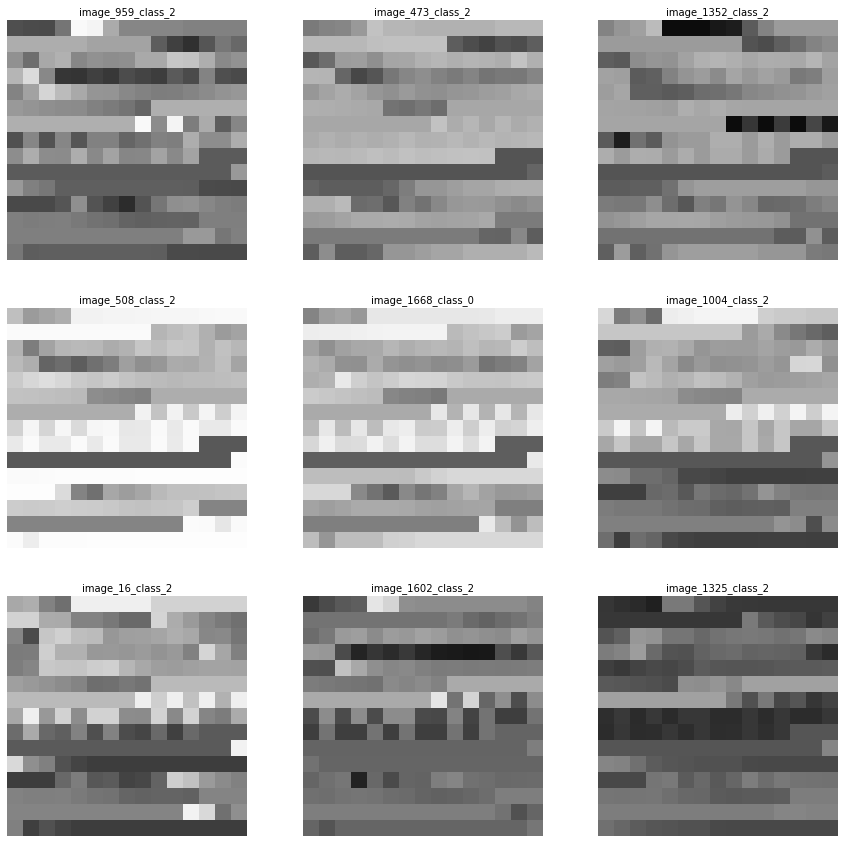

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 15))
columns = rows = 3
for i in range(1, columns*rows +1):
    index = np.random.randint(len(x_train))
    img = x_train[index]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title('image_'+str(index)+'_class_'+str(np.argmax(y_train[index])), fontsize=10)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.imshow(img)
plt.show()

In [ ]:
from utils import print_with_timestamp, show_images
show_images(3,3, arr=x_train)

In [17]:
x_train[0].shape

(15, 15, 3)

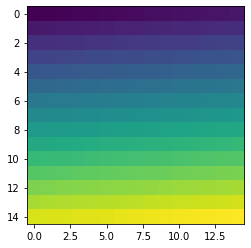

In [19]:
test = [i for i in range(225)]
test = np.array(test).reshape(-1, 1)
#test = scaler.fit_transform(test)
dim = int(np.sqrt(num_features))
test = np.reshape(test, (dim, dim))
plt.imshow(test)

In [20]:
np.array(test).reshape(1, -1)

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [21]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.initializers import RandomUniform, RandomNormal
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers

params = {'batch_size': 80, 'conv2d_layers': {'conv2d_do_1': 0.2, 'conv2d_filters_1': 32, 'conv2d_kernel_size_1': 3, 'conv2d_mp_1': 0, 
                                               'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.3, 
                                               'conv2d_filters_2': 64, 'conv2d_kernel_size_2': 3, 'conv2d_mp_2': 2, 'conv2d_strides_2': 1, 
                                               'kernel_regularizer_2': 0.0, 'layers': 'two'}, 
           'dense_layers': {'dense_do_1': 0.3, 'dense_nodes_1': 128, 'kernel_regularizer_1': 0.0, 'layers': 'one'},
           'epochs': 200, 'lr': 0.001, 'optimizer': 'adam'}


In [22]:
from functools import *
from sklearn.metrics import f1_score
from tensorflow.keras.metrics import AUC

def f1_custom(y_true, y_pred):
    y_t = np.argmax(y_true, axis=1)
    y_p = np.argmax(y_pred, axis=1)
    f1_score(y_t, y_p, labels=None, average='weighted', sample_weight=None, zero_division='warn')

def create_model_cnn(params):
    model = Sequential()

    print("Training with params {}".format(params))
    
    conv2d_layer1 = Conv2D(params["conv2d_layers"]["conv2d_filters_1"],
                           params["conv2d_layers"]["conv2d_kernel_size_1"],
                           strides=params["conv2d_layers"]["conv2d_strides_1"],
                           kernel_regularizer=regularizers.l2(params["conv2d_layers"]["kernel_regularizer_1"]), 
                           padding='same',activation="relu", use_bias=True,
                           kernel_initializer='glorot_uniform',
                           input_shape=(x_train[0].shape[0],
                                        x_train[0].shape[1], x_train[0].shape[2]))
    model.add(conv2d_layer1)
    if params["conv2d_layers"]['conv2d_mp_1'] > 1:
        model.add(MaxPool2D(pool_size=params["conv2d_layers"]['conv2d_mp_1']))
        
    model.add(Dropout(params['conv2d_layers']['conv2d_do_1']))
    if params["conv2d_layers"]['layers'] == 'two':
        conv2d_layer2 = Conv2D(params["conv2d_layers"]["conv2d_filters_2"],
                               params["conv2d_layers"]["conv2d_kernel_size_2"],
                               strides=params["conv2d_layers"]["conv2d_strides_2"],
                               kernel_regularizer=regularizers.l2(params["conv2d_layers"]["kernel_regularizer_2"]),
                               padding='same',activation="relu", use_bias=True,
                               kernel_initializer='glorot_uniform')
        model.add(conv2d_layer2)
        
        if params["conv2d_layers"]['conv2d_mp_2'] > 1:
            model.add(MaxPool2D(pool_size=params["conv2d_layers"]['conv2d_mp_2']))
        
        model.add(Dropout(params['conv2d_layers']['conv2d_do_2']))

    model.add(Flatten())

    model.add(Dense(params['dense_layers']["dense_nodes_1"], activation='relu'))
    model.add(Dropout(params['dense_layers']['dense_do_1']))

    if params['dense_layers']["layers"] == 'two':
        model.add(Dense(params['dense_layers']["dense_nodes_2"], activation='relu', 
                        kernel_regularizer=params['dense_layers']["kernel_regularizer_1"]))
        model.add(Dropout(params['dense_layers']['dense_do_2']))

    model.add(Dense(3, activation='softmax'))
    
    if params["optimizer"] == 'rmsprop':
        optimizer = optimizers.RMSprop(lr=params["lr"])
    elif params["optimizer"] == 'sgd':
        optimizer = optimizers.SGD(lr=params["lr"], decay=1e-6, momentum=0.9, nesterov=True)
    elif params["optimizer"] == 'adam':
        optimizer = optimizers.Adam(learning_rate=params["lr"], beta_1=0.9, beta_2=0.999, amsgrad=False)
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_metric])
    
    return model

def check_baseline(pred, y_test):
    print("size of test set", len(y_test))
    e = np.equal(pred, y_test)
    print("TP class counts", np.unique(y_test[e], return_counts=True))
    print("True class counts", np.unique(y_test, return_counts=True))
    print("Pred class counts", np.unique(pred, return_counts=True))
    holds = np.unique(y_test, return_counts=True)[1][2]  # number 'hold' predictions
    print("baseline acc:", (holds/len(y_test)*100))

In [24]:
import os
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

model = create_model_cnn(params)

best_model_path = os.path.join('.', 'best_model_keras')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=100, min_delta=0.0001)
# csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'log_training_batch.log'), append=True)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.02, patience=20, verbose=1, mode='min',
                        min_delta=0.001, cooldown=1, min_lr=0.0001)
mcp = ModelCheckpoint(best_model_path, monitor='val_f1_metric', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='max', period=1)  # val_f1_metric

In [25]:
%%time
history = model.fit(x_train, y_train, epochs=params['epochs'], verbose=1,
                            batch_size=64, shuffle=True,
                            # validation_split=0.3,
                            validation_data=(x_cv, y_cv),
                            callbacks=[mcp, rlp, es]
                            , sample_weight=sample_weights)

Epoch 1/200
30/30 [==============================] - 4s 75ms/step - loss: 1.0312 - accuracy: 0.2981 - f1_metric: 0.1429 - val_loss: 1.0795 - val_accuracy: 0.1811 - val_f1_metric: 0.1061

Epoch 00001: val_f1_metric improved from -inf to 0.10608, saving model to ./best_model_keras
INFO:tensorflow:Assets written to: ./best_model_keras/assets
Epoch 2/200
30/30 [==============================] - 2s 64ms/step - loss: 0.7899 - accuracy: 0.3133 - f1_metric: 0.1987 - val_loss: 1.1389 - val_accuracy: 0.1747 - val_f1_metric: 0.1289

Epoch 00002: val_f1_metric improved from 0.10608 to 0.12895, saving model to ./best_model_keras
INFO:tensorflow:Assets written to: ./best_model_keras/assets
Epoch 3/200
30/30 [==============================] - 2s 58ms/step - loss: 0.7046 - accuracy: 0.3565 - f1_metric: 0.2537 - val_loss: 1.0405 - val_accuracy: 0.3200 - val_f1_metric: 0.2509

Epoch 00003: val_f1_metric improved from 0.12895 to 0.25085, saving model to ./best_model_keras
INFO:tensorflow:Assets written t


Epoch 00061: val_f1_metric did not improve from 0.64108
Epoch 62/200
30/30 [==============================] - 2s 52ms/step - loss: 0.3560 - accuracy: 0.6546 - f1_metric: 0.6553 - val_loss: 0.6607 - val_accuracy: 0.6042 - val_f1_metric: 0.6034

Epoch 00062: val_f1_metric did not improve from 0.64108
Epoch 63/200
30/30 [==============================] - 2s 51ms/step - loss: 0.3526 - accuracy: 0.6556 - f1_metric: 0.6558 - val_loss: 0.6407 - val_accuracy: 0.6211 - val_f1_metric: 0.6190

Epoch 00063: val_f1_metric did not improve from 0.64108
Epoch 64/200
30/30 [==============================] - 2s 53ms/step - loss: 0.3506 - accuracy: 0.6856 - f1_metric: 0.6858 - val_loss: 0.6347 - val_accuracy: 0.6253 - val_f1_metric: 0.6229

Epoch 00064: val_f1_metric did not improve from 0.64108
Epoch 65/200
30/30 [==============================] - 2s 52ms/step - loss: 0.3530 - accuracy: 0.6709 - f1_metric: 0.6702 - val_loss: 0.6411 - val_accuracy: 0.6316 - val_f1_metric: 0.6288

Epoch 00065: val_f1_met

Epoch 95/200
30/30 [==============================] - 2s 59ms/step - loss: 0.3424 - accuracy: 0.6714 - f1_metric: 0.6719 - val_loss: 0.6452 - val_accuracy: 0.6253 - val_f1_metric: 0.6256

Epoch 00095: val_f1_metric did not improve from 0.64316
Epoch 96/200
30/30 [==============================] - 3s 113ms/step - loss: 0.3189 - accuracy: 0.7083 - f1_metric: 0.7079 - val_loss: 0.5788 - val_accuracy: 0.6653 - val_f1_metric: 0.6654

Epoch 00096: val_f1_metric improved from 0.64316 to 0.66536, saving model to ./best_model_keras
INFO:tensorflow:Assets written to: ./best_model_keras/assets
Epoch 97/200
30/30 [==============================] - 2s 56ms/step - loss: 0.3373 - accuracy: 0.6909 - f1_metric: 0.6910 - val_loss: 0.6766 - val_accuracy: 0.6211 - val_f1_metric: 0.6190

Epoch 00097: val_f1_metric did not improve from 0.66536
Epoch 98/200
30/30 [==============================] - 2s 56ms/step - loss: 0.3245 - accuracy: 0.6867 - f1_metric: 0.6876 - val_loss: 0.6327 - val_accuracy: 0.6442 - v

30/30 [==============================] - 2s 55ms/step - loss: 0.3176 - accuracy: 0.7172 - f1_metric: 0.7168 - val_loss: 0.6102 - val_accuracy: 0.6611 - val_f1_metric: 0.6615

Epoch 00128: val_f1_metric did not improve from 0.66536
Epoch 129/200
30/30 [==============================] - 1s 50ms/step - loss: 0.3107 - accuracy: 0.7062 - f1_metric: 0.7051 - val_loss: 0.6221 - val_accuracy: 0.6463 - val_f1_metric: 0.6478

Epoch 00129: val_f1_metric did not improve from 0.66536
Epoch 130/200
30/30 [==============================] - 2s 52ms/step - loss: 0.3017 - accuracy: 0.7330 - f1_metric: 0.7329 - val_loss: 0.6010 - val_accuracy: 0.6589 - val_f1_metric: 0.6595

Epoch 00130: val_f1_metric did not improve from 0.66536
Epoch 131/200
30/30 [==============================] - 2s 51ms/step - loss: 0.3385 - accuracy: 0.7051 - f1_metric: 0.7066 - val_loss: 0.6513 - val_accuracy: 0.6253 - val_f1_metric: 0.6256

Epoch 00131: val_f1_metric did not improve from 0.66536
Epoch 132/200
30/30 [=============

30/30 [==============================] - 2s 51ms/step - loss: 0.2980 - accuracy: 0.7251 - f1_metric: 0.7261 - val_loss: 0.6082 - val_accuracy: 0.6737 - val_f1_metric: 0.6785

Epoch 00192: val_f1_metric did not improve from 0.70074
Epoch 193/200
30/30 [==============================] - 1s 49ms/step - loss: 0.2847 - accuracy: 0.7457 - f1_metric: 0.7467 - val_loss: 0.5815 - val_accuracy: 0.6905 - val_f1_metric: 0.6915

Epoch 00193: val_f1_metric did not improve from 0.70074
Epoch 194/200
30/30 [==============================] - 2s 55ms/step - loss: 0.2779 - accuracy: 0.7557 - f1_metric: 0.7558 - val_loss: 0.6100 - val_accuracy: 0.6674 - val_f1_metric: 0.6700

Epoch 00194: val_f1_metric did not improve from 0.70074
Epoch 195/200
30/30 [==============================] - 2s 50ms/step - loss: 0.2728 - accuracy: 0.7615 - f1_metric: 0.7623 - val_loss: 0.5957 - val_accuracy: 0.6821 - val_f1_metric: 0.6863

Epoch 00195: val_f1_metric did not improve from 0.70074
Epoch 196/200
30/30 [=============

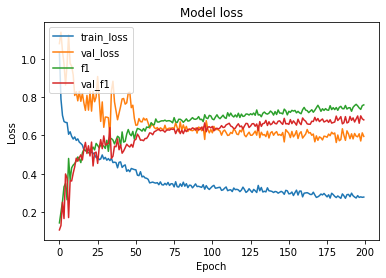

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline
#InteractiveShell.ast_node_interactivity = "last"

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['f1_metric'])
plt.plot(history.history['val_f1_metric'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss', 'f1', 'val_f1'], loc='upper left')
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix, roc_auc_score, cohen_kappa_score
import seaborn as sns

model = load_model(best_model_path)
test_res = model.evaluate(x_test, y_test, verbose=0)
print("keras evaluate=", test_res)
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
check_baseline(pred_classes, y_test_classes)
conf_mat = confusion_matrix(y_test_classes, pred_classes)
print(conf_mat)
labels = [0,1,2]

f1_weighted = f1_score(y_test_classes, pred_classes, labels=None, 
         average='weighted', sample_weight=None)
print("F1 score (weighted)", f1_weighted)
print("F1 score (macro)", f1_score(y_test_classes, pred_classes, labels=None, 
         average='macro', sample_weight=None))
print("F1 score (micro)", f1_score(y_test_classes, pred_classes, labels=None, 
         average='micro', sample_weight=None))  # weighted and micro preferred in case of imbalance

# https://scikit-learn.org/stable/modules/model_evaluation.html#cohen-s-kappa --> supports multiclass; ref: https://stats.stackexchange.com/questions/82162/cohens-kappa-in-plain-english
print("cohen's Kappa", cohen_kappa_score(y_test_classes, pred_classes))

recall = []
for i, row in enumerate(conf_mat):
    recall.append(np.round(row[i]/np.sum(row), 2))
    print("Recall of class {} = {}".format(i, recall[i]))
print("Recall avg", sum(recall)/len(recall))

keras evaluate= [0.752422571182251, 0.6228955984115601, 0.6226242184638977]
size of test set 594
TP class counts (array([0, 1, 2]), array([ 21,  21, 328]))
True class counts (array([0, 1, 2]), array([ 34,  33, 527]))
Pred class counts (array([0, 1, 2]), array([133, 108, 353]))
baseline acc: 88.72053872053873
[[ 21   0  13]
 [  0  21  12]
 [112  87 328]]
F1 score (weighted) 0.6923152035221899
F1 score (macro) 0.43160796395603374
F1 score (micro) 0.622895622895623
cohen's Kappa 0.1616882666851479
Recall of class 0 = 0.62
Recall of class 1 = 0.64
Recall of class 2 = 0.62
Recall avg 0.6266666666666666


In [28]:
print(pred_classes)

[2 1 2 2 0 2 2 2 1 2 2 2 2 2 0 0 2 2 1 2 0 2 1 0 0 0 0 2 0 1 1 2 2 2 2 0 1
 2 2 2 0 1 2 2 2 0 2 2 1 2 2 2 2 2 0 2 0 0 0 2 2 2 2 2 2 0 2 1 1 2 2 0 2 0
 0 0 2 2 2 1 2 1 2 1 2 2 2 0 2 2 0 0 1 2 1 1 2 2 0 2 2 0 1 0 1 0 0 2 1 2 2
 2 0 2 2 2 2 0 2 2 1 1 2 2 2 2 2 2 2 2 0 2 0 2 2 0 0 0 1 2 2 0 2 0 2 2 2 1
 1 2 2 0 2 1 0 1 1 2 2 0 2 2 2 1 0 0 0 2 0 2 0 0 2 2 2 2 1 2 2 0 2 0 2 1 1
 2 2 2 2 2 2 1 0 2 2 0 2 1 1 1 2 2 2 1 2 1 0 1 0 0 2 2 2 1 2 1 2 2 2 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 1 1 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 1 0
 2 0 2 2 0 2 1 2 0 2 0 0 2 2 2 0 2 2 2 0 1 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 2
 0 0 2 0 0 2 2 0 0 2 2 2 1 2 2 2 2 1 1 2 2 2 2 1 1 0 1 1 1 2 0 2 2 2 1 2 1
 1 2 1 2 2 1 0 2 1 2 0 0 2 2 2 0 0 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2
 2 0 0 0 2 0 1 0 1 2 2 0 2 2 0 0 2 1 0 2 2 2 2 2 2 2 1 2 0 2 1 0 2 1 2 2 2
 1 2 0 1 2 2 2 2 2 2 2 1 2 0 2 2 0 1 0 2 2 2 0 2 2 2 2 0 0 2 2 1 2 2 1 2 2
 2 2 2 2 2 1 0 2 0 1 2 0 1 2 1 2 2 0 2 1 2 2 2 2 1 1 1 0 2 2 2 2 2 1 2 1 2
 0 1 0 2 2 0 0 2 2 1 2 2 